# Partial Estimation / Measurement Noise Reduction

This notebook contain the empirical extension described in Section 8 of the paper.

> In the case wherethere is a single backlog, we ask the question, will an organization still benefit from a partial noise reduction when some propositions’ values are obtained under reduced uncertainty while others are subject to the original noise level?

In [1]:
import numpy as np
from normal_normal_partial_model import get_partial_noise_reduction_value_samples
from matplotlib import pyplot as plt

# Function definitions

In [2]:
def get_improvement_against_p(N, M, mu_X, sigma_X, mu_epsilon, 
                              sigma_1, sigma_2, p_list, verbose=False):
    
    sigma_sq_1 = sigma_1 ** 2
    sigma_sq_2 = sigma_2 ** 2
    sigma_sq_X = sigma_X ** 2
    NUM_SAMPLES = 5000
    
    exp_improvements = []
    CI_lows = []
    CI_highs = []
    
    print("Parameters: N = {}, M = {}, mu_X = {}, sigma_X = {}, "
      "mu_epsilon = {}, sigma_1 = {}, sigma_2 = {}"
      .format(N, M, mu_X, sigma_X, mu_epsilon, sigma_1, sigma_2))

    for p in p_list:
        _, _, improvement = (
            get_partial_noise_reduction_value_samples(
                NUM_SAMPLES, N, M, mu_X, mu_epsilon, 
                sigma_sq_X, sigma_sq_1, sigma_sq_2, p, verbose=False)
        )

        exp_improvement = np.mean(improvement)
        CI_low = np.percentile(improvement, 5)
        CI_high = np.percentile(improvement, 95)

        exp_improvements.append(exp_improvement)
        CI_lows.append(CI_low)
        CI_highs.append(CI_high)
        
        if verbose:
            print("p = {}, Improvement = {}, CI = [{}, {}]"
                  .format(p, np.round(exp_improvement, 4),
                          np.round(CI_low, 4), np.round(CI_high, 4)))
            
    return exp_improvements, CI_lows, CI_highs

In [3]:
def generate_improvement_against_p_plot(p_list, exp_improvements, CI_lows, CI_highs):
    fig, ax = plt.subplots()
    
    ax.errorbar(p_list, exp_improvements, 
                yerr=[np.array(exp_improvements) - np.array(CI_lows), 
                      np.array(CI_highs) - np.array(exp_improvements)],
                fmt='o-', capsize=3)
    
    ax.axhline(0, c='black')
#     ax.set_xlabel('p')
#     ax.set_ylabel('Improvement')
    
    return fig, ax

# Plotting the relationship between expected improvement

Here we test we are able to generate one figure.

In [4]:
N = 2500
M = 500

sigma_X = 1
sigma_1 = 0.5
sigma_2 = 0.4
mu_epsilon = 0
mu_X = 0

p_list = np.arange(0, 1.01, 0.1)
exp_improvements, CI_lows, CI_highs = (
    get_improvement_against_p(N, M, mu_X, sigma_X, mu_epsilon, 
                              sigma_1, sigma_2, p_list, verbose=True)
)

Parameters: N = 2500, M = 500, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.5, sigma_2 = 0.4
p = 0.0, Improvement = 0.0002, CI = [-0.0259, 0.0256]
p = 0.1, Improvement = 0.0048, CI = [-0.0205, 0.0306]
p = 0.2, Improvement = 0.0088, CI = [-0.0166, 0.0341]
p = 0.30000000000000004, Improvement = 0.0141, CI = [-0.0114, 0.0401]
p = 0.4, Improvement = 0.0185, CI = [-0.0065, 0.043]
p = 0.5, Improvement = 0.0235, CI = [-0.001, 0.0478]
p = 0.6000000000000001, Improvement = 0.028, CI = [0.004, 0.0525]
p = 0.7000000000000001, Improvement = 0.033, CI = [0.0094, 0.057]
p = 0.8, Improvement = 0.0377, CI = [0.0137, 0.0616]
p = 0.9, Improvement = 0.043, CI = [0.0201, 0.0662]
p = 1.0, Improvement = 0.0474, CI = [0.0247, 0.0708]


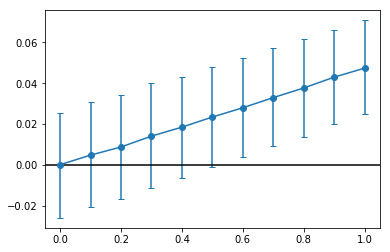

In [5]:
fig, ax = generate_improvement_against_p_plot(p_list, exp_improvements, CI_lows, CI_highs)

fig

# Generating all the figures

The following code generates the figures in Figure 5 of the paper.

The output is stored in the path `../output/partial_noise_<params>.pdf`.

In [7]:
parameters = [
    {'N': 50, 'M': 5, 'sigma_X': 1, 'sigma_1': 0.5, 'sigma_2': 0.4},
    {'N': 50, 'M': 20, 'sigma_X': 1, 'sigma_1': 0.5, 'sigma_2': 0.4},
    {'N': 2500, 'M': 250, 'sigma_X': 1, 'sigma_1': 0.5, 'sigma_2': 0.4},
    {'N': 2500, 'M': 1000, 'sigma_X': 1, 'sigma_1': 0.5, 'sigma_2': 0.4},
    {'N': 50, 'M': 5, 'sigma_X': 1, 'sigma_1': 0.8, 'sigma_2': 0.2},
    {'N': 50, 'M': 20, 'sigma_X': 1, 'sigma_1': 0.8, 'sigma_2': 0.2},
    {'N': 2500, 'M': 250, 'sigma_X': 1, 'sigma_1': 0.8, 'sigma_2': 0.2},
    {'N': 2500, 'M': 1000, 'sigma_X': 1, 'sigma_1': 0.8, 'sigma_2': 0.2},
]

mu_epsilon = 0
mu_X = 0

for parameter in parameters:

    p_list = np.arange(0, 1.01, 0.1)
    exp_improvements, CI_lows, CI_highs = (
        get_improvement_against_p(
            parameter['N'], parameter['M'], 
            mu_X, parameter['sigma_X'], 
            mu_epsilon, parameter['sigma_1'], parameter['sigma_2'], 
            p_list, verbose=False)
    )

    fig, ax = generate_improvement_against_p_plot(p_list, exp_improvements, 
                                                  CI_lows, CI_highs)
    fig.set_size_inches(2, 2.5)
    fig.savefig("../output/partial_noise_{}_{}_{}_{}_{}.pdf"
                .format(parameter['N'], parameter['M'], 
                        str(parameter['sigma_X']).replace('.', '-'),
                        str(parameter['sigma_1']).replace('.', '-'),
                        str(parameter['sigma_2']).replace('.', '-')),
                transparent=True, bbox_inches='tight')

Parameters: N = 50, M = 5, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.5, sigma_2 = 0.4
Parameters: N = 50, M = 20, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.5, sigma_2 = 0.4
Parameters: N = 2500, M = 250, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.5, sigma_2 = 0.4
Parameters: N = 2500, M = 1000, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.5, sigma_2 = 0.4
Parameters: N = 50, M = 5, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.8, sigma_2 = 0.2
Parameters: N = 50, M = 20, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.8, sigma_2 = 0.2
Parameters: N = 2500, M = 250, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.8, sigma_2 = 0.2
Parameters: N = 2500, M = 1000, mu_X = 0, sigma_X = 1, mu_epsilon = 0, sigma_1 = 0.8, sigma_2 = 0.2
